## 0. EDA (\*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the `load_dataset` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

b) Use describe only on those columns that are relevant to get statistical information from.

c) Make some plots on some of the columns that you find interesting.

d) Check if there are any columns you might want to drop.

In [21]:
from seaborn import load_dataset

# mpg = miles per gallon
df = load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [35]:
# a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.
df.shape, df.columns

((398, 9),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model_year', 'origin', 'name'],
       dtype='object'))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [24]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
# b) Use describe only on those columns that are relevant to get statistical information from.
df.describe().drop(["count", "25%", "75%"]).T

,mean,std,min,50%,max
mpg,23.514573,7.815984,9.0,23.0,46.6
cylinders,5.454774,1.701004,3.0,4.0,8.0
displacement,193.425879,104.269838,68.0,148.5,455.0
horsepower,104.469388,38.491160,46.0,93.5,230.0
weight,2970.424623,846.841774,1613.0,2803.5,5140.0
acceleration,15.568090,2.757689,8.0,15.5,24.8
model_year,76.010050,3.697627,70.0,76.0,82.0


<Axes: title={'center': 'acceleration'}, xlabel='acceleration'>

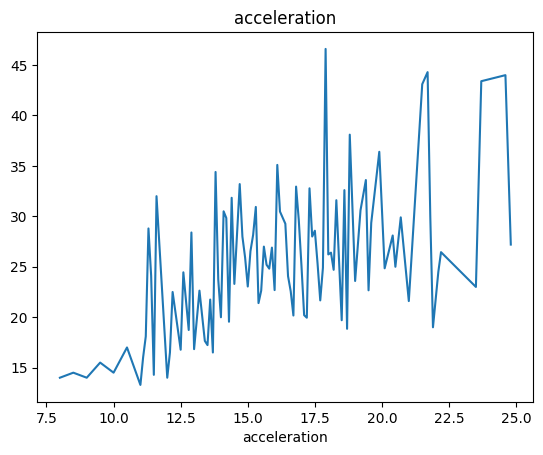

In [ ]:
import pandas as pd
# c) Make some plots on some of the columns that you find interesting.
df.groupby("acceleration")["mpg"].mean().plot(title="acceleration")

<Axes: title={'center': 'weight'}, xlabel='weight'>

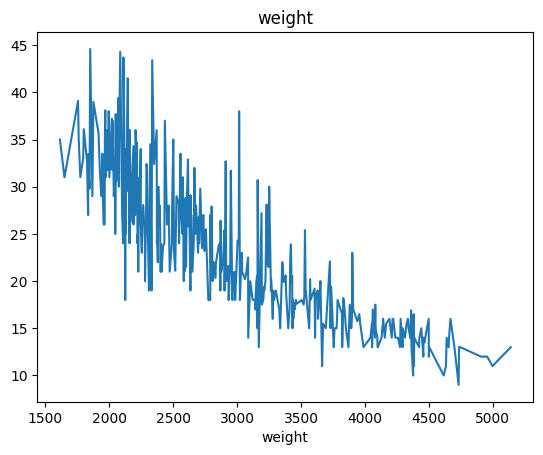

In [ ]:
df.groupby("weight")["mpg"].mean().plot(title="weight")

<Axes: title={'center': 'horsepower'}, xlabel='horsepower'>

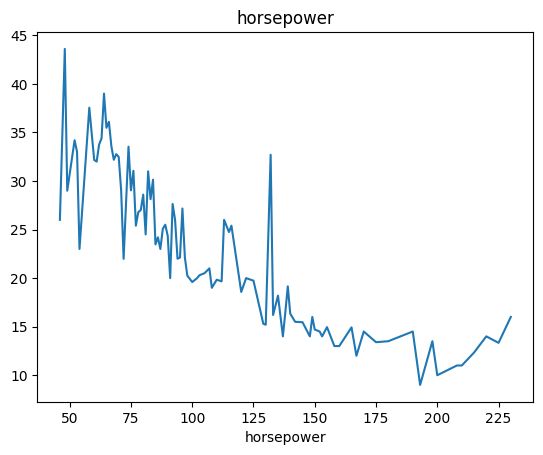

In [ ]:
df.groupby("horsepower")["mpg"].mean().plot(title="horsepower")

<Axes: title={'center': 'displacement'}, xlabel='displacement'>

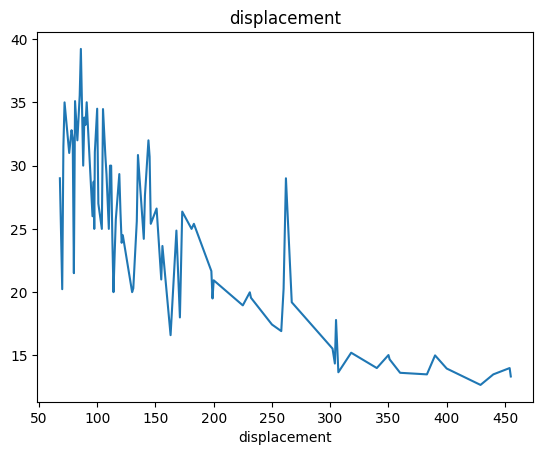

In [ ]:
df.groupby("displacement")["mpg"].mean().plot(title="displacement")

<Axes: title={'center': 'cylinders'}, xlabel='cylinders'>

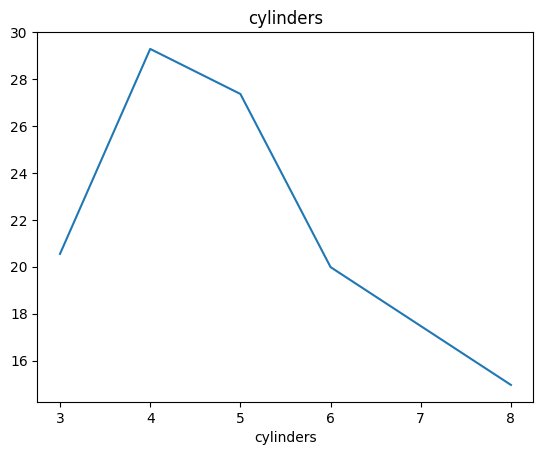

In [30]:
df.groupby("cylinders")["mpg"].mean().plot(title="cylinders")

<Axes: title={'center': 'model_year'}, xlabel='model_year'>

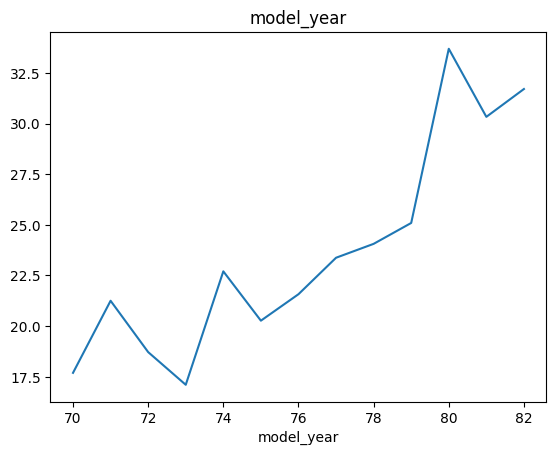

In [ ]:
df.groupby("model_year")["mpg"].mean().plot(title="model_year")

In [36]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
# d) Check if there are any columns you might want to drop.
# target='mpg'
# features='cylinders', 'displacement', 'weight', 'acceleration', 'model_year'
# drop 'origin', 'name' and 'horsepower'